In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

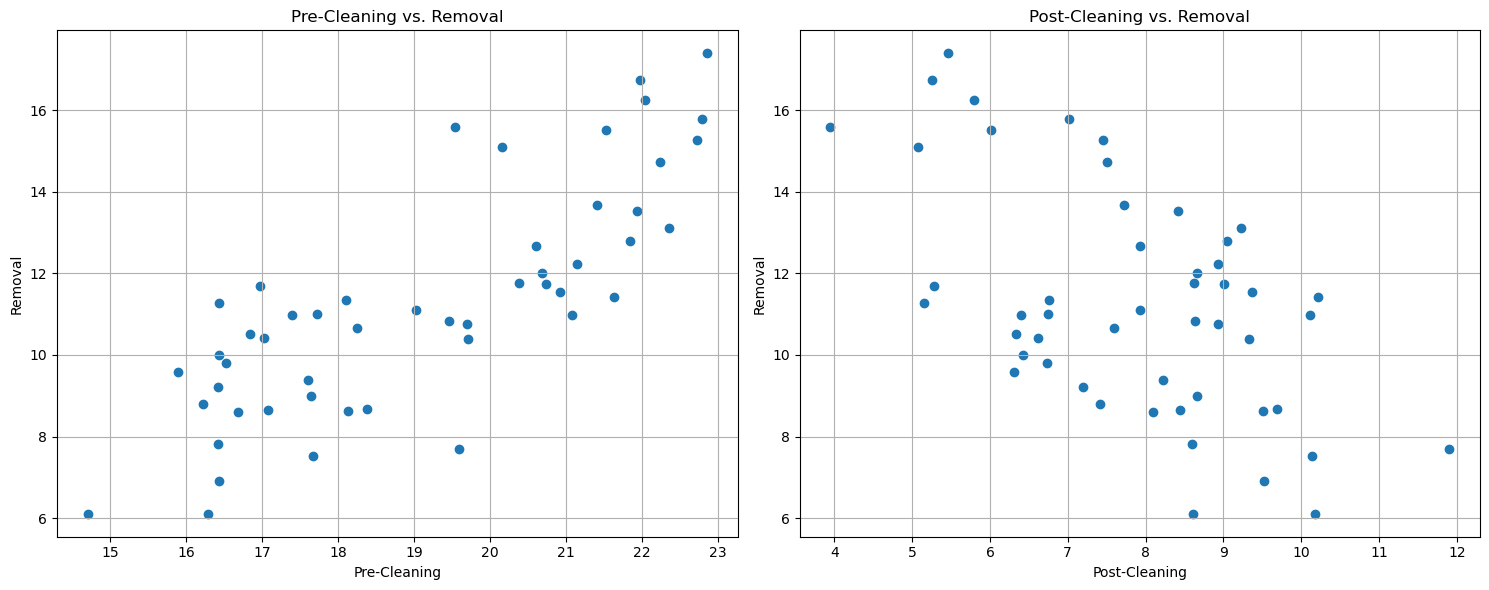

In [2]:
##
# Load the dataset:
#
dataframe = pd.read_csv("../linear-regression/dataset/Cleaning.csv")
X1 = dataframe["Pre-Cleaning"]
X2 = dataframe["Post-Cleaning"]
Y = dataframe["Removal"]

##
# Visualize the dataset:
#
fig, axs = plt.subplots(1,2, figsize = (15,6), dpi = 100)
axs[0].scatter(X1, Y)
axs[0].set_title('Pre-Cleaning vs. Removal')
axs[0].set_xlabel('Pre-Cleaning')
axs[0].set_ylabel('Removal')
axs[0].grid(True)

axs[1].scatter(X2, Y)
axs[1].set_title('Post-Cleaning vs. Removal')
axs[1].set_xlabel('Post-Cleaning')
axs[1].set_ylabel('Removal')
axs[1].grid(True)

fig.tight_layout()
plt.show()

## Least Square Method
For n-dimensional data ($\mathbf{X}, \mathbf{Y} \in \mathbb{R}^{m\times n}$):
$$
\mathbf{Y} = \beta_0 + \beta_1\mathbf{X} 
$$

$$
\begin{aligned}
\beta_1 &= (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{Y} \\
\beta_0 &= E[\mathbf{Y}] - \beta_1\mathbf{X}
\end{aligned}
$$

For 1-dimensional data ($\mathbf{x}, \mathbf{y} \in \mathbb{R}^{m}$):
$$
\mathbf{y} = \beta_0 + \beta_1\mathbf{x} 
$$

$$
\begin{aligned}
\beta_1 &= \frac{\sum_{i = 1}^m (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i = 1}^m (x_i - \bar{x})^2} \\
\beta_0 &= \bar{y} - \beta_1\bar{x}
\end{aligned}
$$

In [3]:
##
# Simple Linear Regression Using Least Square Method (1-dimensional):
#
def one_dimensional_least_square(X, Y):
    numerator = np.dot([(x - np.mean(X)) for x in X], [(y - np.mean(Y)) for y in Y])
    denominator = np.sum([(x - np.mean(X)) ** 2 for x in X])
    beta_1 = numerator / denominator
    beta_0 = np.mean(Y) - beta_1 * np.mean(X)
    return beta_0, beta_1

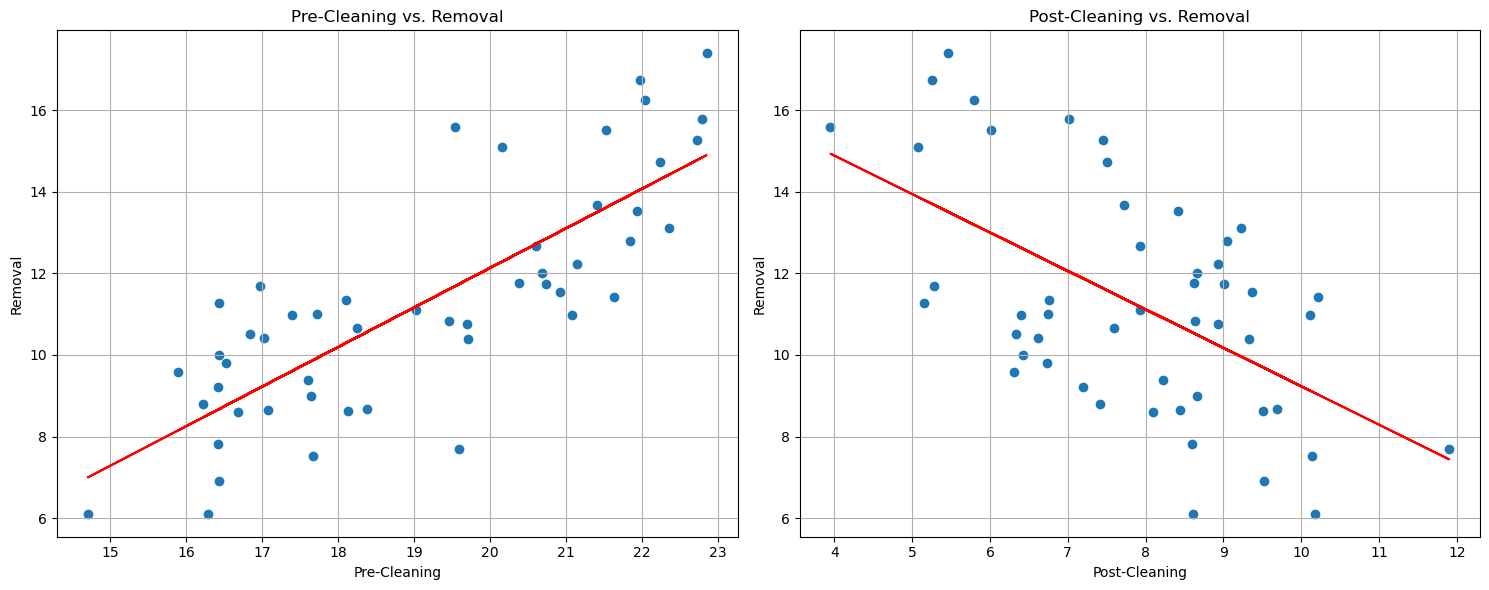

In [4]:
beta_0_X1, beta_1_X1 = one_dimensional_least_square(X1, Y)
Yhat_1 = beta_0_X1 + beta_1_X1 * X1
f1 = lambda x: beta_0_X1 + beta_1_X1 * x

beta_0_X2, beta_1_X2 = one_dimensional_least_square(X2, Y)
Yhat_2 = beta_0_X2 + beta_1_X2 * X2
f2 = lambda x: beta_0_X2 + beta_1_X2 * x

fig, axs = plt.subplots(1,2, figsize = (15,6), dpi = 100)
axs[0].scatter(X1, Y)
axs[0].plot(X1, f1(X1), color = 'red')
axs[0].set_title('Pre-Cleaning vs. Removal')
axs[0].set_xlabel('Pre-Cleaning')
axs[0].set_ylabel('Removal')
axs[0].grid(True)

axs[1].scatter(X2, Y)
axs[1].plot(X2, f2(X2), color = 'red')
axs[1].set_title('Post-Cleaning vs. Removal')
axs[1].set_xlabel('Post-Cleaning')
axs[1].set_ylabel('Removal')
axs[1].grid(True)

fig.tight_layout()
plt.show()

## Gradient Descent Method:
Our objective is to minimize the mean of squared residuals.
$$
\text{min} \quad \frac{1}{m}\sum_{i = 1}^m(y_i - \beta_0 - \beta_1x_i)^2
$$

The gradient descent method has the following follows:
* Step 1: initialize $\beta_0$ and $\beta_1$. The intial values of the parameters $\beta_1$ and $\beta_0$ are usually drawn from a truncated normal distribution with zero mean and a specific standard deviation $\mathcal{N}(0, \sigma \sqrt{\frac{2}{m}})$
* Step 2: compute the gradient of the loss function in respect to $\beta_0$ and $\beta_1$. In this scenario, the loss function is the mean of squared residuals:
$$
\begin{aligned}
\nabla_{\beta_1} &= -\frac{2}{m}\sum_{i=1}^m(y_i - \beta_0 - \beta_1x_i)(x_i) \\
\nabla_{\beta_0} &= -\frac{2}{m}\sum_{i=1}^m(y_i - \beta_0 - \beta_1x_i) \\
\end{aligned}
$$
* Step 3: update $\beta_0$ and $\beta_1$. The parameters at the $k + 1$ iteration equal to the parameters at the $k$ iteration minus the learning step, which is the product of the learning rate $\eta$ and the gradients.
$$
\begin{aligned}
\beta_1^{k+1} &= \beta_1^{k} - \eta\nabla_{\beta_1}  \\
\beta_0^{k+1} &= \beta_0^{k} - \eta\nabla_{\beta_0}  \\
\end{aligned}
$$


In [5]:
##
# Simple Linear Regression Using Gradient Descent Method (1-dimensional)
#
def initialize_parameters(m):
    initial_weight = np.random.normal(loc = 0, scale = (2 / m) ** (1/2))
    return initial_weight

def compute_gradients(m, initial_beta_1, initial_beta_0, X, Y):
    Yhat = initial_beta_0 + initial_beta_1 * X
    gradient_beta_1 = (- 2 / m) * np.dot(Y - Yhat, X)
    gradient_beta_0 = (- 2 / m) * np.sum(Y - Yhat)
    return gradient_beta_1, gradient_beta_0

def update_weights(lr, gradient, old_weight):
    new_weight = old_weight - lr * gradient
    return new_weight

def train(X, Y, lr, num_iter):
    m = len(X)
    beta_0 = initialize_parameters(m)
    beta_1 = initialize_parameters(m)
    # print(f"beta_1: {beta_1}"); print(f"beta_0: {beta_0}")

    for i in range(num_iter):
        gradient_beta_1, gradient_beta_0 = compute_gradients(m, beta_1, beta_0, X, Y)
        beta_1 = update_weights(lr, gradient_beta_1, beta_1)
        beta_0 = update_weights(lr, gradient_beta_0, beta_0)

    return beta_1, beta_0

In [6]:
gd_beta_1_X1, gd_beta_0_X1 = train(X1, Y, 0.001, 10000)
f1 = lambda x: gd_beta_0_X1 + gd_beta_1_X1 * x

In [9]:
gd_beta_1_X2, gd_beta_0_X2 = train(X2, Y, 0.01, 10000)
f2 = lambda x: gd_beta_0_X2 + gd_beta_1_X2 * x

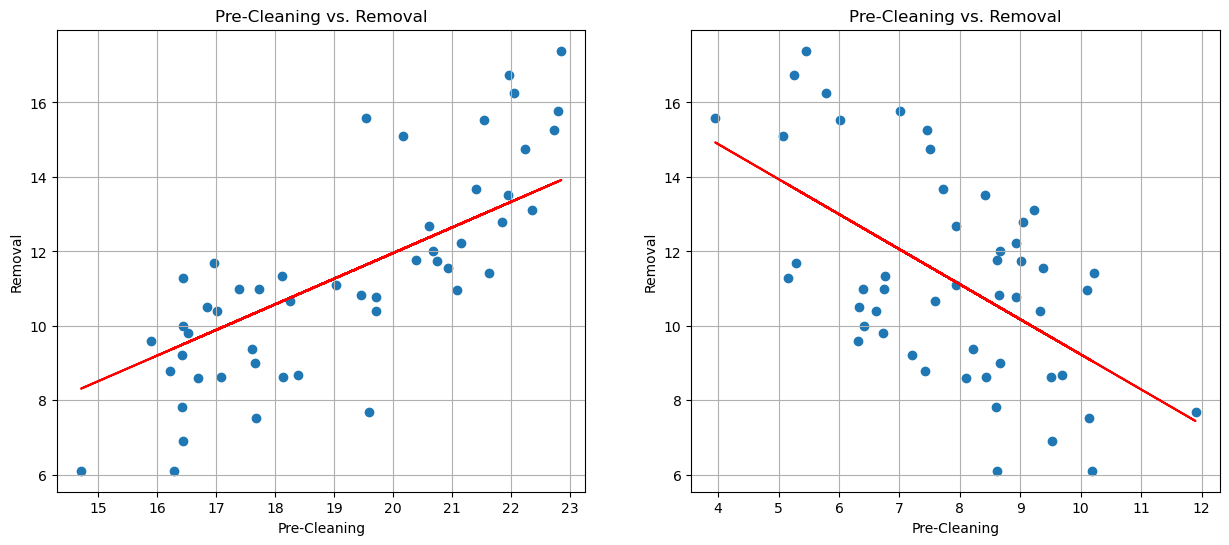

In [10]:
fig, axs = plt.subplots(1,2, figsize = (15,6), dpi = 100)
axs[0].scatter(X1, Y)
axs[0].plot(X1, f1(X1), color = 'red')
axs[0].set_title('Pre-Cleaning vs. Removal')
axs[0].set_xlabel('Pre-Cleaning')
axs[0].set_ylabel('Removal')
axs[0].grid(True)

axs[1].scatter(X2, Y)
axs[1].plot(X2, f2(X2), color = 'red')
axs[1].set_title('Pre-Cleaning vs. Removal')
axs[1].set_xlabel('Pre-Cleaning')
axs[1].set_ylabel('Removal')
axs[1].grid(True)